In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "iitk.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
integral_image = cv2.integral(image)

In [4]:
filters = [
    np.array([[-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [ 1,  1, -1, -1],
              [ 1,  1, -1, -1]]),

    np.array([[-1, -1, -1, -1],
              [-1, -1, -1, -1],
              [ 1,  1,  1,  1],
              [ 1,  1,  1,  1]]),

    np.array([[-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]]),

    np.array([[ 1,  1, -1, -1],
              [ 1,  1, -1, -1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]]),

    np.array([[-1, -1, -1, -1],
              [-1, -1, -1, -1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]]),

    np.array([[ 1,  1,  1,  1],
              [ 1, -1, -1, -1],
              [ 1, -1, -1, -1],
              [ 1, -1, -1, -1]])
]

In [5]:
def region_sum(ii, x1, y1, x2, y2):
    if x1 < 0 or y1 < 0 or x2 >= ii.shape[1] or y2 >= ii.shape[0]:
        return 0
    return ii[y2 + 1, x2 + 1] - ii[y1, x2 + 1] - ii[y2 + 1, x1] + ii[y1, x1]

In [6]:
def apply_haar_filter(ii, haar_filter):
    h, w = ii.shape
    filter_h, filter_w = haar_filter.shape
    response = np.zeros((h - filter_h, w - filter_w))

    for y in range(h - filter_h - 1):
        for x in range(w - filter_w - 1):
            for fy in range(filter_h):
                for fx in range(filter_w):
                    weight = haar_filter[fy, fx]
                    if weight != 0:
                        response[y, x] += weight * region_sum(ii, x + fx, y + fy, x + fx, y + fy)
    response = (response - response.min()) / (response.max() - response.min()) * 255
    return response

In [7]:
responses = [apply_haar_filter(integral_image, f) for f in filters]

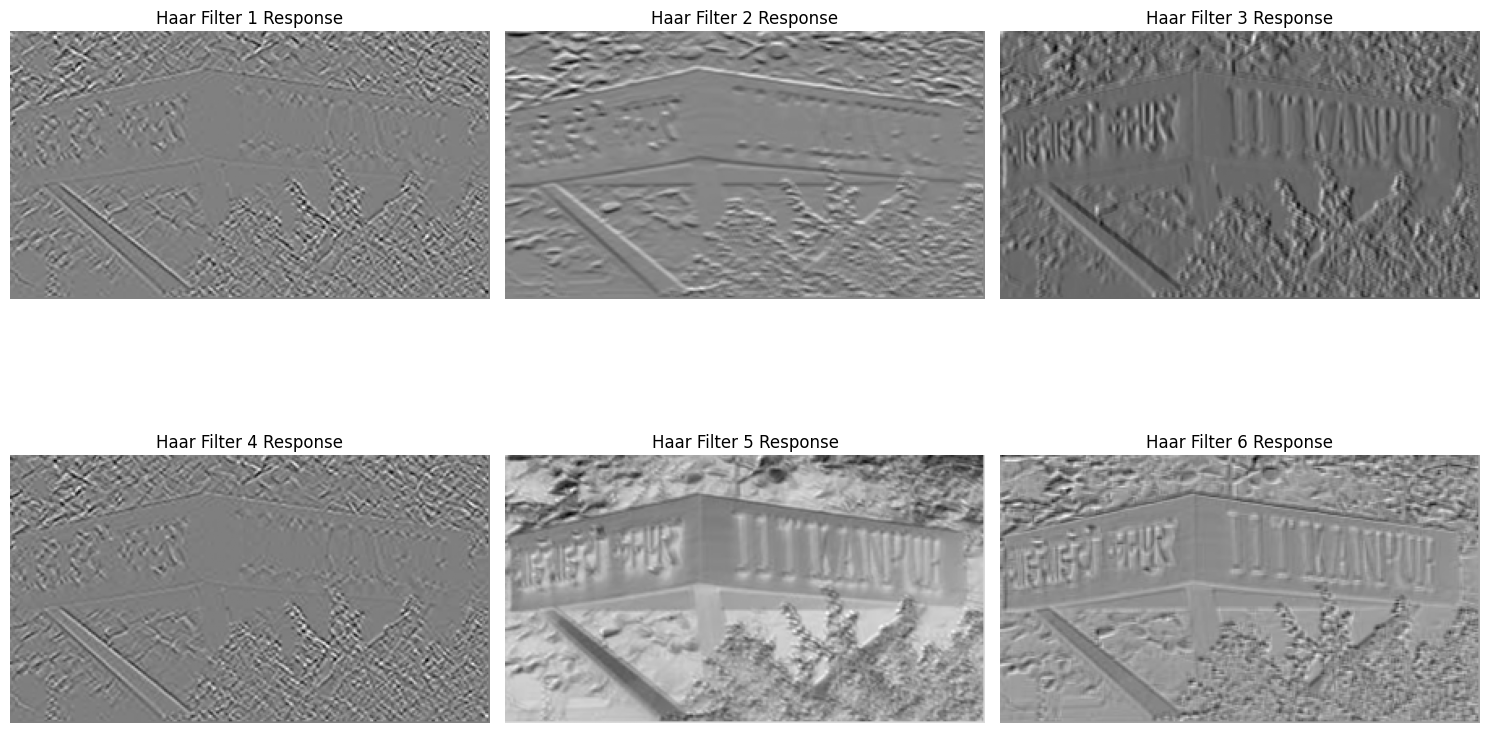

In [8]:
plt.figure(figsize=(15, 10))
for i, response in enumerate(responses):
    plt.subplot(2, 3, i + 1)
    plt.title(f"Haar Filter {i + 1} Response")
    plt.imshow(response, cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
plt.tight_layout()
plt.show()